In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi",                
               "Claudia Wagner",
               "Markus Strohmaier"]
__license__ = "GPL"
__version__ = "1.0.0"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<div style="text-align:center;"><h1>Toy-Example (Figure 1)</h1></div>

<h2>Dependencies</h2>

In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [3]:
import os
import sys
import operator
import matplotlib
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt

In [4]:
%load_ext autoreload
%autoreload 2
sys.path.append('../code')

from org.gesis.libs.ranking import _rank_function_graph
from org.gesis.libs.viz import plot_setup

<h2>Plotting setup</h2>

In [5]:
font = {'family' : 'normal',
        'weight' : 'normal', #bold
        'size'   : 15}

matplotlib.rc('font', **font)
colors = {'min':'#ec8b67', 'maj':'#6aa8cb'}

In [6]:
PLOTS = '../plots/'      # Folder to store plots
plot_setup(latex=True)   # Latex environment
node_size = 70           # size of nodes (viz)
arrow_size = 8          # size of edge arrow (viz)
lw = 1.2                 # line-width (ranking) (viz)
nww = 0.21
nwh = 0.21

In [7]:
### Main figure
fig, axes = plt.subplots(2,2,figsize=(4.0, 3.5),sharex=True,sharey=True)

<h2>a) Example 1</h2>
<h3>maj --> min</h3>

In [8]:
### Network 1: Only majority points to minority

### Graph
G = nx.DiGraph()

G.add_edge('Mb','m1')
G.add_edge('Mc','m1')
G.add_edge('Md','m1')
G.add_edge('Me','m1')

G.add_edge('Ma','m2')
G.add_edge('Mb','m2')
G.add_edge('Mc','m2')
G.add_edge('Md','m2')

### Node attributes
minorities = ['m1','m2']
nx.set_node_attributes(G=G, values={n:n in minorities for n in G.nodes()}, name='minority')

### Graph properties
m = 2
M = 5
N = G.number_of_nodes()
G.graph['class'] = 'minority'

### Ranking
(rank, fmt), minority_fraction = _rank_function_graph(G, metric='pagerank')

### Plotting ranking
axes[0,0].plot(rank,fmt,colors['min'],linewidth=lw)
axes[0,0].axhline(m/(M+m), ls='--', c='grey')
axes[0,0].text(2,0.8,'a)', fontsize=14)

### Plotting graph
ax = plt.axes([0.30, 0.66, nww-0.01, nwh-0.01])
pos = nx.circular_layout(G)
node_color = [colors['min'] if n in minorities else colors['maj'] for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color = node_color, node_size = node_size, ax=ax)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='grey', arrows=True, arrowsize=arrow_size, ax=ax)
plt.axis('off')

(-1.1005705252144031,
 1.1996017241153956,
 -1.1796627230389785,
 1.1796627400688766)

<h2>b) Example 2</h2>
<h3>min --> maj</h3>

In [9]:
### Network 2: Only minority points to majority

### Graph
G = nx.DiGraph()

G.add_edge('m1','Mb')
G.add_edge('m1','Mc')
G.add_edge('m1','Md')
G.add_edge('m1','Me')

G.add_edge('m2','Ma')
G.add_edge('m2','Mb')
G.add_edge('m2','Mc')
G.add_edge('m2','Md')

### Node attributes
minorities = ['m1','m2']
nx.set_node_attributes(G=G, values={n:n in minorities for n in G.nodes()}, name='minority')

### Graph properties
m = 2
M = 5
N = G.number_of_nodes()
G.graph['class'] = 'minority'

### Ranking
(rank, fmt), minority_fraction = _rank_function_graph(G, metric='pagerank')

### Plotting ranking
axes[0,1].plot(rank,fmt,colors['min'], linewidth=lw)
axes[0,1].axhline(m/(M+m), ls='--', c='grey')
axes[0,1].text(2,0.8,'b)', fontsize=14)

### Plotting graph
ax = plt.axes([0.65, 0.66, nww, nwh])
node_color = [colors['min'] if n in minorities else colors['maj'] for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color = node_color, node_size = node_size, ax=ax)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black', arrows=True, arrowsize=arrow_size, ax=ax)
plt.axis('off')


(-1.1005705252144031,
 1.1996017241153956,
 -1.1796627230389785,
 1.1796627400688766)

<h2>c) Example 3</h2>
<h3>min --> maj and min --> min</h3>

In [10]:
### Network 3: Minority points to both majority and minority

### Graph
G = nx.DiGraph()
G.add_edge('m1','m2')
G.add_edge('m2','m1')

G.add_edge('m1','Mb')
G.add_edge('m1','Mc')
G.add_edge('m1','Md')
G.add_edge('m1','Me')

G.add_edge('m2','Ma')
G.add_edge('m2','Mb')
G.add_edge('m2','Mc')
G.add_edge('m2','Md')

### Node attributes
minorities = ['m1','m2']
nx.set_node_attributes(G=G, values={n:n in minorities for n in G.nodes()}, name='minority')

### Graph properties
m = 2
M = 5
N = G.number_of_nodes()
G.graph['class'] = 'minority'

### Ranking
(rank, fmt), minority_fraction = _rank_function_graph(G, metric='pagerank')

### Plotting ranking
axes[1,0].plot(rank,fmt,colors['min'],linewidth=lw)
axes[1,0].axhline(m/(M+m), ls='--', c='grey')
axes[1,0].text(2,0.8,'c)', fontsize=14)

### Plotting graph
ax = plt.axes([0.25, 0.26, nww, nwh])
node_color = [colors['min'] if n in minorities else colors['maj'] for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color = node_color, node_size = node_size, ax=ax)
edge_color = ['black' if e in [('m1','m2'),('m2','m1')] else 'grey' for e in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_color, arrows=True, arrowsize=arrow_size, ax=ax)
plt.axis('off')


(-1.1005705252144031,
 1.1996017241153956,
 -1.1796627230389785,
 1.1796627400688766)

<h2>d) Example 4</h2>
<h3>min --> maj and min --> min and maj --> min</h3>

In [11]:
### Network 4: Minority points to both majority and minority, but also one majority points to one minority

### Graph
G = nx.DiGraph()
G.add_edge('m1','m2')
G.add_edge('m2','m1')

G.add_edge('m1','Mb')
G.add_edge('m1','Mc')
G.add_edge('m1','Md')
G.add_edge('m1','Me')

G.add_edge('m2','Ma')
G.add_edge('m2','Mb')
G.add_edge('m2','Mc')
G.add_edge('m2','Md')

G.add_edge('Ma','m1')

### Node attributes
minorities = ['m1','m2']
nx.set_node_attributes(G=G, values={n:n in minorities for n in G.nodes()}, name='minority')

### Graph properties
m = 2
M = 5
N = G.number_of_nodes()
G.graph['class'] = 'minority'

### Ranking
(rank, fmt), minority_fraction = _rank_function_graph(G, metric='pagerank')

### Plotting ranking
axes[1,1].plot(rank,fmt,colors['min'],linewidth=lw)
axes[1,1].axhline(m/(M+m), ls='--', c='grey')
axes[1,1].set_xlim((-5,110))
axes[1,1].text(2,0.8,'d)', fontsize=14)

### Plotting graph
ax = plt.axes([0.68, 0.26, nww, nwh])
node_color = [colors['min'] if n in minorities else colors['maj'] for n in G.nodes()]
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color = node_color, node_size = node_size, ax=ax)
edge_color = ['black' if e == ('Ma','m1') else 'grey' for e in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_color, arrows=True, arrowsize=arrow_size, ax=ax)
plt.axis('off')


(-1.1005705252144031,
 1.1996017241153956,
 -1.1796627230389785,
 1.1796627400688766)

<h2>Final figure</h2>

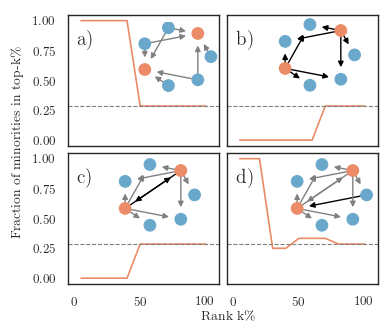

In [12]:
axes[1,0].text(-49, 1.85, 'Fraction of minorities in top-k\%', rotation=90)
axes[1,0].text(96, -0.35, 'Rank k\%')

plt.axis('off')
plt.subplots_adjust(hspace=0.05, wspace=0.05)

fn = os.path.join(PLOTS,'example.pdf')
if fn is not None:
    plt.savefig(fn, bbox_inches='tight')

plt.show()